__HOMEWORK 4: LINEAR REGRESSION__

Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

### Problem 2
Viết code numpy model linear regression cho bài toán dữ đoán giá nhà, [dataset](https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv).

In [2]:
def extract_data(file_path):
    data = pd.read_csv(file_path, skiprows=1, header=None)
    x = data[0]
    y = data[1]
    return x, y

class LinearRegressionTwoC:
    def __init__(self):
        self._w = None
        
    def model_fit(self, x, t):
        # Estimate w
        # x_1 = np.array([np.ones(x.shape[0]), x]).T # Redefine x (add 1 column contains 1 to x)
        x_1 = np.c_[x, np.ones(x.shape[0])]
        self._w = np.linalg.inv(x_1.T.dot(x_1)) # Calculating (X^TX)^(-1)
        # np.linalg.inv(A) - calculate the inverse matrix of A
        # A.dot(B): dot product of A and B
        self._w = self._w.dot(x_1.T.dot(t))
        return self._w
    
    def predict(self, x):
        return self._w[0]*x + self._w[1]

In [7]:
x1, y1 = extract_data("../data/data_linear.csv")
model1 = LinearRegressionTwoC()
w1 = model1.model_fit(x1, y1)
print("w =", w1)

FileNotFoundError: [Errno 2] No such file or directory: '../data/data_linear.csv'

__a. Vẽ đường thẳng dự đoán và scatter plot dữ liệu gốc__

In [ ]:
def linear_regression(x, y):
    # Calculate the coefficients of the linear regression line
    slope, intercept = np.polyfit(x, y, deg=1) # deg: number of degree of freedom

    # Create a range of x values
    x_range = np.linspace(min(x), max(x))

    # Calculate the corresponding y values for the line
    y_range = intercept + slope * x_range

    # Plot the original data points
    plt.scatter(x, y, color='#0077b6', label='Real Data')

    # Plot the line of linear regression
    plt.plot(x_range, y_range, color='#fb8500', label='Linear Regression Model')

    # Label the axes and add a title
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('House Price Prediction')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

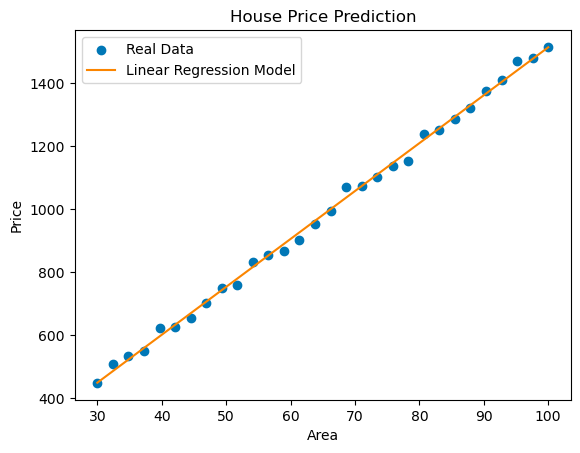

In [ ]:
linear_regression(x1, y1)

__b. Dự đoán giá các căn nhà có diện tích 50, 100, 150__

In [ ]:
output = [['Diện tích', 'Giá nhà dự đoán'], [50, model1.predict(50)], [100, model1.predict(100)], [150, model1.predict(150)]]
print(tabulate(output, headers="firstrow", tablefmt='fancy_grid'))

╒═════════════╤═══════════════════╕
│   Diện tích │   Giá nhà dự đoán │
╞═════════════╪═══════════════════╡
│          50 │            753.49 │
├─────────────┼───────────────────┤
│         100 │           1514.04 │
├─────────────┼───────────────────┤
│         150 │           2274.6  │
╘═════════════╧═══════════════════╛


### Problem 3
Viết code numpy model linear regression cho bài toán dự đoán giá nhà

In [4]:
def extract_data_2(file_path):
    data = pd.read_csv(file_path, header=None, delimiter="\s+")
    x = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return x, y

class LinearRegressionMultiC(LinearRegressionTwoC):
    def __init__(self):
        super().__init__()
    
    def predict(self, x):
        if isinstance(x, list):
            x.append(1)
            x = np.array(x)
        else:
            x = np.append(x,1)
        return self._w.dot(x.T)

In [6]:
x2, y2 = extract_data_2("../data/housing.csv")
model2 = LinearRegressionMultiC()
w2 = model2.model_fit(x2, y2)
print("w =", w2)

TypeError: can't multiply sequence by non-int of type 'float'

In [9]:
# test the prediction
model2.predict([0.00632, 18.00, 2.310, 0, 0.5380, 6.5750, 65.20, 4.0900, 1, 296.0, 15.30, 396.90, 4.98])

30.00384337701375